In [1]:
%matplotlib inline
import spacy
from spacy import displacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['RequiredQual'])
print(df.shape)
print("Removed {0} duplicates (based on RequiredQual)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(16689, 24)
Removed 2312 duplicates (based on RequiredQual)


In [3]:
df["RequiredQual"] = df["RequiredQual"].astype(str)
df["RequiredQual"].head()

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [7]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [14]:
#print(df["RequiredQual"][0])
doc = nlp(df["RequiredQual"][0])


for ent in doc.ents:
    stripped_content = ent.text.strip()
    if stripped_content != "" and stripped_content[0] != "-":
        print(ent.text + " Label: " + ent.label_)

fiscal Label: DATE
IBM Label: ORG
5-7 years Label: DATE
Accounting/ Corporate Finance/ Banking Label: ORG
CFO Label: ORG
CFA Label: ORG
ACCA Label: ORG
Business
Administration Label: ORG
Accounting or Finance Label: ORG
English Label: LANGUAGE
Armenian Label: NORP
Russian Label: NORP


In [23]:
def get_orgs_from_doc(document):
    doc = nlp(document)
    org_entities = ""
    
    for ent in doc.ents:
        stripped_content = ent.text.strip()
        if stripped_content != "" and stripped_content[0] != "-":
            if ent.label_ == "ORG":
                entity = ent.text
                entity = entity.replace("/", " ").replace("\n", " ")
                org_entities += entity + " "
                
    return org_entities

In [24]:
get_orgs_from_doc(df["RequiredQual"][0])

'IBM Accounting  Corporate Finance  Banking CFO CFA ACCA Business Administration Accounting or Finance '

In [25]:
df["RequiredQualORGs"] = df["RequiredQual"].apply(get_orgs_from_doc)
df["RequiredQualORGs"].head()

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    IBM Accounting  Corporate Finance  Banking CFO...
1                                                     
2                                                     
3                                      Programming SM 
4                                                     
Name: RequiredQualORGs, dtype: object

In [29]:
required_qual_orgs = ""
for _, row in df.iterrows():
    required_qual_orgs += row["RequiredQualORGs"]

In [36]:
from wordcloud import WordCloud
def plotWC(text):
    
    wc = WordCloud(background_color="white").generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))

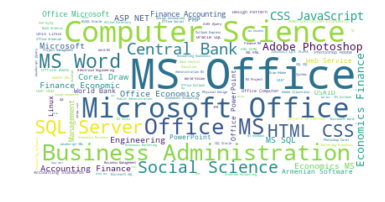

In [37]:
plotWC(required_qual_orgs)